# Naive Bayes

## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model).

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, flatten each image to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
>```
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
```

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.


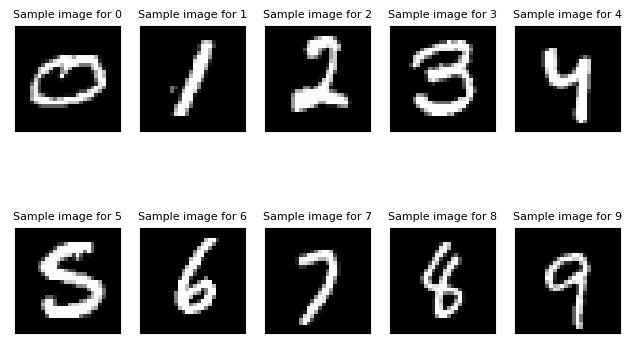

In [2]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
DIMS = (28,28)
try:
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')
except:
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

sample = y.groupby(y).sample(1).index
fig, axs = plt.subplots(2,5)
for ax, s in zip(axs.flatten(), sample):
    label = y.loc[s]
    img = X.loc[s].values.reshape(DIMS)
    ax.set_title(f'Sample image for {label}', fontsize=8)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(img, cmap='gray')
    
fig.tight_layout()

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7)

### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 


**Bonus:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1
i is the specific pixel.

j is the digit label

For an arbitrary sample $x$, our classification rule is:

$\hat{y} = argmax_y P(y|x) = argmax_j \frac{P(x|y=j) * P(y=j)}{P(x)} = argmax_j \prod_i \frac{P(x_i|y=j)*P(y=j)}{P(x)}= argmax_y \prod_i \frac{P(y=j) * (p_{ji}*x_i + (1-p_{ji})(1-x_i))}{P(x)}$

Where $p_{ji}$'s definition is given above . 

Parameters:

Prior = $P(y=j) = \frac{\text{count of docs of class y}}{\text{total docs count}}$

Evidence = $ P(x_i) = \frac{\text{count of word i in all documents}}{\text{count of all words in all doccuments}}$

Likelihood = $ P(x_i|y) = \frac{\text{count of word i in documents of type y +} \lambda}{\text{count of all words in document of type y} + \lambda * \text{Number of words in vocaculary}}$

where $\lambda$ is a smoothing constant used to make sure that every word is represented in each type of document. That way, the product of probabilities won't turn out it be 0, regardless of the probabilities of other, non-missing, words) 

#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2
Put you answer here...

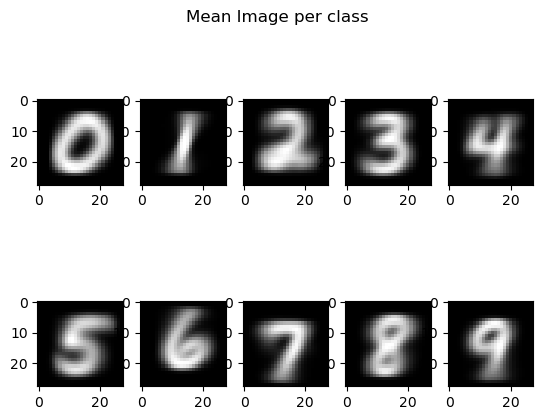

In [4]:
from sklearn.naive_bayes import BernoulliNB
import numpy as np

nb = BernoulliNB(binarize=True).fit(X_train,y_train)
fig, axs = plt.subplots(2,5)

probs = np.exp(nb.feature_log_prob_)
for ax, digit in zip(axs.ravel(), range(nb.feature_log_prob_.shape[0])):
    ax.imshow(probs[digit].reshape(DIMS), cmap='gray')
fig.suptitle('Mean Image per class');

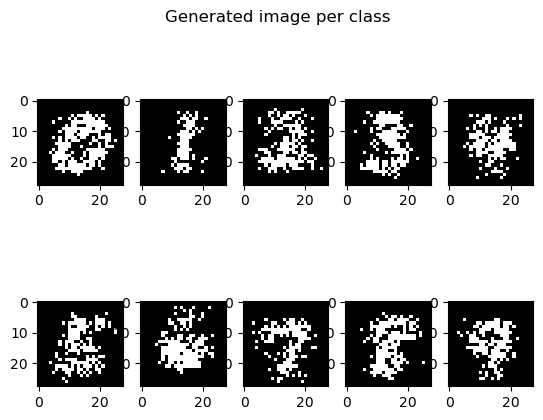

In [5]:
fig, axs = plt.subplots(2,5)

generated_sample = np.random.binomial(1, probs)
for ax, digit in zip(axs.ravel(), range(nb.feature_log_prob_.shape[0])):
    ax.imshow(generated_sample[digit].reshape(DIMS), cmap='gray')
fig.suptitle('Generated image per class');

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
confusion = confusion_matrix(y_test, nb.predict(X_test), labels=y_test.cat.categories)
print(confusion)
print(f' Total accuracy: {confusion.trace() / y_test.shape[0]}')

[[ 908    2   10    8    2   53   16    0   19    2]
 [   0 1097   11    3    1   11    4    0   18    1]
 [  17   15  834   27   17    3   29   12   43    4]
 [   4   27   33  808    2   26    6   21   48   32]
 [   8    8    9    0  739    3   11    0   24  125]
 [  28   13    2  164   28  619   19    3   27   27]
 [  17   27   12    1   11   29  904    0    6    0]
 [   5   24   12    3   30    3    0  849   20   76]
 [  10   37   19   79   11   31    1    0  732   41]
 [  13   20    4   15   65    2    0   33   34  793]]
 Total accuracy: 0.8283


After looking at the plot in the next cell, I thought that an interesting approach would be to train a 1-level decision tree classifier for each pixel (or several, via one vs all etc), where the label is the digit. The split suggested by each tree would be one that does a good job at seperating the trees to two relatively pure groups, which is what we're after. So for instance for the pixel in the plot below, classes with high variance like 2,3,5 would be ignored, and a decent split would probably be somewhere around 75.  
It might be too computationally expensive though, so another option is to just take the median value for every class, and take the median of those as a threshold. Do this for every pixel.

<AxesSubplot:xlabel='class', ylabel='pixel210'>

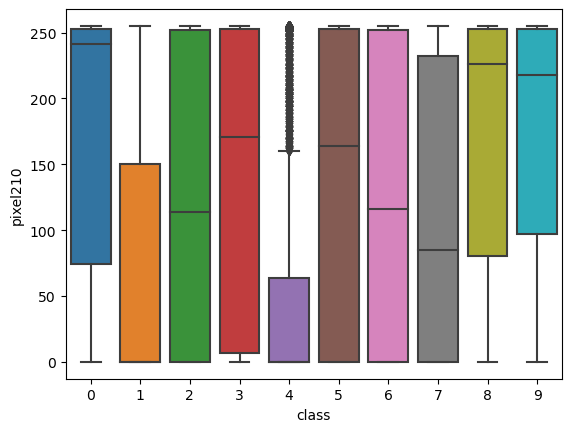

In [7]:
sns.boxplot(y=X_train['pixel210'], x=y_train)

## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.


* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* Write a class `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_proba` methods.
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`. If there are differences try to think why
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).

### Optional: Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$ 
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words. 

Bonus: How can you correct the analyzed error? 

To read more about model interpretation, see the blogpost below and my tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why

In [8]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin

X_train, y_train = fetch_20newsgroups(subset='train', remove=('headers','footers','quotes'), return_X_y=True)
X_test, y_test = fetch_20newsgroups(subset='test', remove=('headers','footers','quotes'), return_X_y=True)

In [9]:
import string
def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  cold_color='\x1b[41;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  def color(token):
    lower = str(token).lower()
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      return hot_color.format(token)
    elif lower in cold:
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
print_txt('This word support the first class but this the other', ['word'],['other'])

This word support the first class but this the other


In [10]:
from itertools import zip_longest

class NaiveBayes(BaseEstimator, ClassifierMixin):
    
    def __init__(self, alpha=1):
        self.alpha = alpha

    def fit(self, x, y):
        
        n,d = x.shape
        
        s = np.argsort(y)
        classes, bins, counts = np.unique(y[s], return_index=True, return_counts=True)
        
        c = len(classes)
        
        self.log_prior = np.log(counts / counts.sum())[np.newaxis, :]
        x = x[s]
        x_per_label = [x[start:end] for start, end in zip_longest(bins, bins[1:], fillvalue=n)]

        self.log_x_given_y = np.zeros((d, c))
        for l, xl in zip(classes, x_per_label):
            self.log_x_given_y[:, l] = np.asarray(xl.sum(axis=0))
        
        # smoothening
        self.log_x_given_y += self.alpha

        self.log_evidence = np.log(self.log_x_given_y).sum(axis=1) / np.log(self.log_x_given_y).sum()

        self.log_x_given_y /= self.log_x_given_y.sum(axis=0, keepdims=True) + d * self.alpha
        
        
        self.log_x_given_y_comp = 1 - self.log_x_given_y 

        np.log(self.log_x_given_y, out=self.log_x_given_y)
        np.log(self.log_x_given_y_comp, out=self.log_x_given_y_comp) 
        return self

    def _unnormalized_log_proba(self, x):
        pos = x @ self.log_x_given_y
        neg = (1-x.toarray()) @ self.log_x_given_y_comp  # I assume binary input
        return (pos + neg + self.log_prior)

    def predict_log_proba(self, x):
        return self._unnormalized_log_proba(x) - self.log_evidence

    def predict(self, x):
        return self._unnormalized_log_proba(x).argmax(axis=1) 

In [45]:
from sklearn.metrics import classification_report
me = make_pipeline(CountVectorizer(stop_words='english', binary=True), NaiveBayes()).fit(X_train, y_train)
y_pred = me.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.6056824216675518
              precision    recall  f1-score   support

           0       0.75      0.10      0.18       319
           1       0.71      0.56      0.63       389
           2       0.77      0.14      0.24       394
           3       0.54      0.69      0.61       392
           4       0.85      0.47      0.61       385
           5       0.57      0.83      0.67       395
           6       0.83      0.72      0.77       390
           7       0.88      0.62      0.72       396
           8       0.49      0.60      0.54       398
           9       0.95      0.68      0.80       397
          10       0.89      0.89      0.89       399
          11       0.38      0.80      0.52       396
          12       0.74      0.39      0.51       393
          13       0.82      0.75      0.78       396
          14       0.66      0.76      0.71       394
          15       0.37      0.92      0.52       398
          16       0.54      0.61      0.57       36

In [46]:
sk = make_pipeline(CountVectorizer(stop_words='english', binary=True), MultinomialNB()).fit(X_train, y_train)
y_pred = sk.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.6245353159851301
              precision    recall  f1-score   support

           0       0.71      0.15      0.24       319
           1       0.67      0.60      0.63       389
           2       0.82      0.09      0.16       394
           3       0.53      0.74      0.62       392
           4       0.81      0.54      0.64       385
           5       0.58      0.83      0.68       395
           6       0.83      0.73      0.77       390
           7       0.84      0.66      0.74       396
           8       0.90      0.61      0.73       398
           9       0.94      0.72      0.82       397
          10       0.58      0.92      0.71       399
          11       0.44      0.79      0.57       396
          12       0.73      0.43      0.54       393
          13       0.83      0.76      0.79       396
          14       0.68      0.77      0.72       394
          15       0.38      0.92      0.54       398
          16       0.56      0.66      0.60       36

In [52]:
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords

from nltk.stem.snowball import EnglishStemmer

stemmer = EnglishStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

params = {'countvectorizer__ngram_range': [(1,1),(1,2)],
          'countvectorizer__binary': [True],
          'countvectorizer__max_df':[0.5, 0.9, 1.0],
          'countvectorizer__min_df':[0.05, 0.1, 1],
          'countvectorizer__stop_words':['english'],
          'countvectorizer__analyzer':['word', stemmed_words],
          }
grid = GridSearchCV(me, params, n_jobs=-1, cv=2, verbose=1).fit(X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


c:\Program Files\Anaconda3\envs\py4dp\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [0.19630546 0.19630546 0.10677037 0.10677037 0.61649284        nan
 0.19630546 0.19630546 0.10677037 0.10677037 0.61649284        nan
 0.19630546 0.19630546 0.10677037 0.10677037 0.61649284        nan
 0.30316422 0.30316422 0.20205056 0.20205056 0.50291674 0.50291674
 0.30130811 0.30130811 0.20284603 0.20284603 0.48957044 0.48957044
 0.30130811 0.30130811 0.20284603 0.20284603 0.48957044 0.48957044]
  warnings.warn(


In [53]:
accuracy_score(y_test,grid.predict(X_test))

0.6056824216675518

In [54]:
grid.best_params_

{'countvectorizer__analyzer': 'word',
 'countvectorizer__binary': True,
 'countvectorizer__max_df': 0.5,
 'countvectorizer__min_df': 1,
 'countvectorizer__ngram_range': (1, 1),
 'countvectorizer__stop_words': 'english'}

Not sure why, but the best params get an identical score to the default params, although the grid serach does pick others.